In [1]:
%matplotlib inline
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

Using TensorFlow backend.


In [2]:
data = pd.read_csv('market_data.csv').drop(columns=['Unnamed: 0', 'Time'])
num_of_ts = data.shape[1]
data_numpy = data.values.T

In [3]:
n = 60


x_train = data_numpy[:num_of_ts/2, :n] * 2000
y_train = data_numpy[:num_of_ts/2, n:] * 2000

x_test = data_numpy[num_of_ts/2:, :n] * 2000
y_test = data_numpy[num_of_ts/2:, n:] * 2000


In [4]:
x_train.shape

(4569, 60)

In [5]:
num_of_ts/2

4569

In [17]:
input_dim = n
model = Sequential()
model.add(Dense(units=4, activation='relu', input_dim=input_dim, kernel_initializer='normal'))
# model.add(Dense(units=60, activation='relu'))
# model.add(Dense(units=40, activation='relu'))
model.add(Dense(units=120-input_dim, activation='linear'))


sgd = optimizers.SGD(lr=0.1)
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['mae'])

model.fit(x_train, y_train, epochs=50, batch_size=2)

Epoch 1/50
4569/4569 [==============================] - 2s 460us/step - loss: 0.1277 - mean_absolute_error: 0.2891
Epoch 2/50
4569/4569 [==============================] - 2s 413us/step - loss: 0.0454 - mean_absolute_error: 0.1763
Epoch 3/50
4569/4569 [==============================] - 2s 412us/step - loss: 0.0436 - mean_absolute_error: 0.1730
Epoch 4/50
4569/4569 [==============================] - 2s 412us/step - loss: 0.0428 - mean_absolute_error: 0.1712
Epoch 5/50
4569/4569 [==============================] - 2s 411us/step - loss: 0.0413 - mean_absolute_error: 0.1678
Epoch 6/50
4569/4569 [==============================] - 2s 414us/step - loss: 0.0384 - mean_absolute_error: 0.1603
Epoch 7/50
4569/4569 [==============================] - 2s 422us/step - loss: 0.0333 - mean_absolute_error: 0.1474
Epoch 8/50
4569/4569 [==============================] - 2s 414us/step - loss: 0.0274 - mean_absolute_error: 0.1319
Epoch 9/50
4569/4569 [==============================] - 2s 417us/step - loss: 0.

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 244       
_________________________________________________________________
dense_6 (Dense)              (None, 60)                300       
Total params: 544
Trainable params: 544
Non-trainable params: 0
_________________________________________________________________


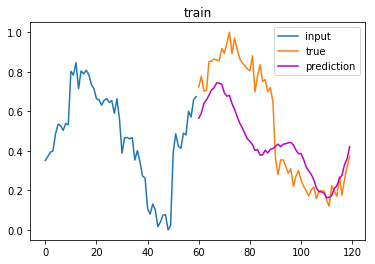

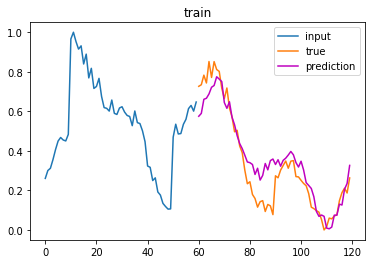

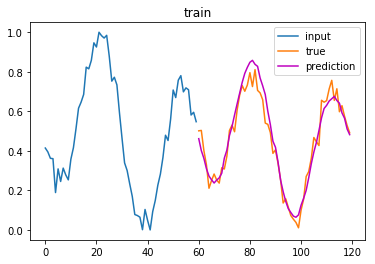

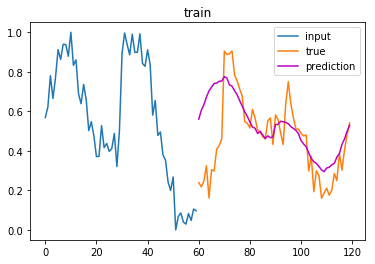

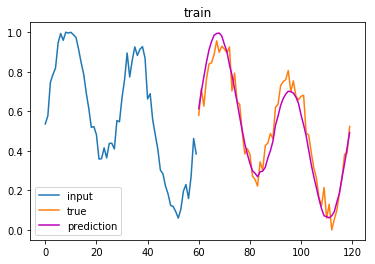

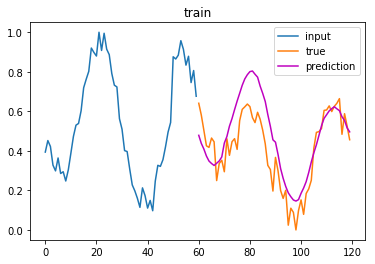

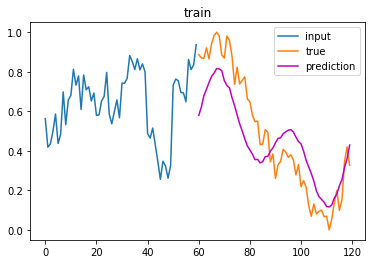

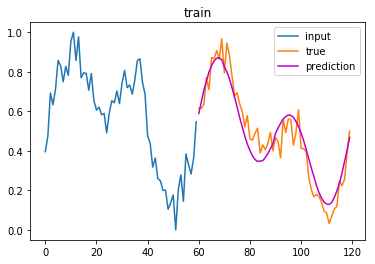

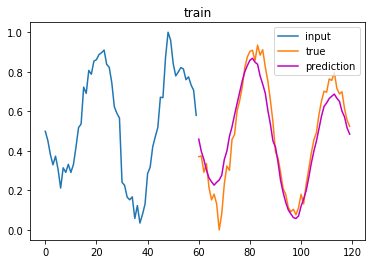

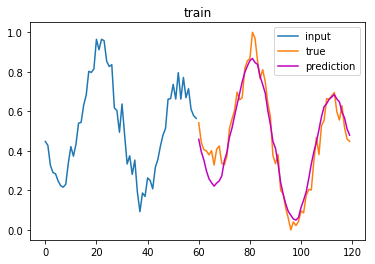

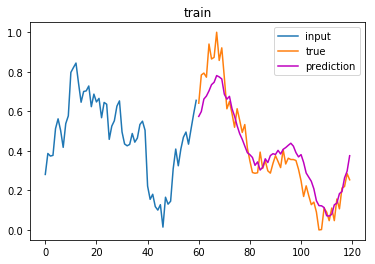

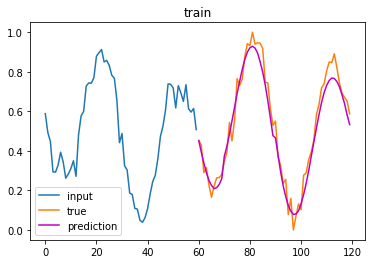

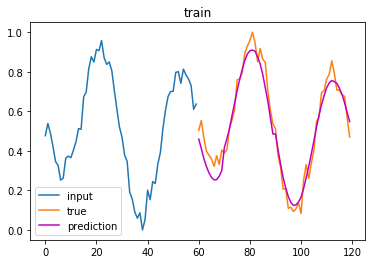

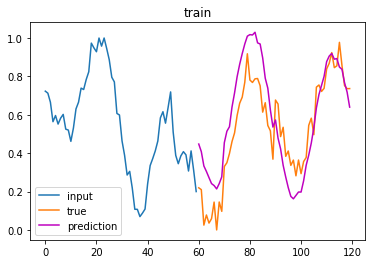

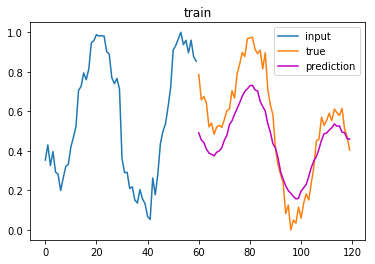

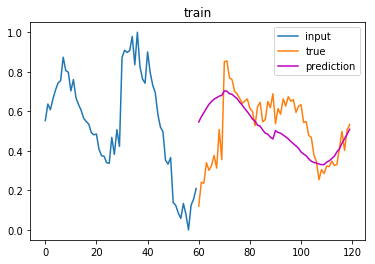

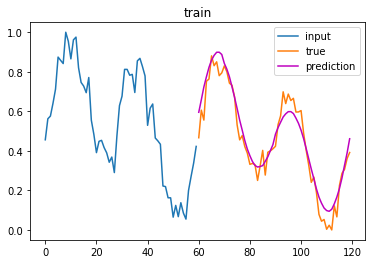

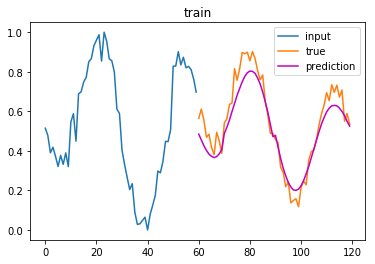

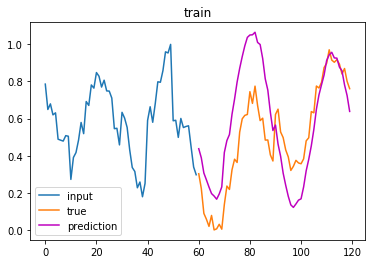

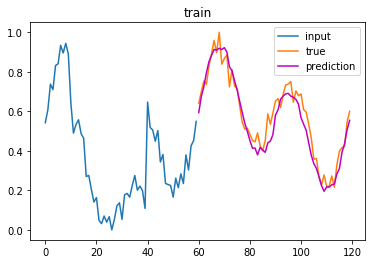

In [19]:
y_pred_train = model.predict(x_train)

random_indexes = range(data.shape[1]/2)
random.shuffle(random_indexes)

for i in random_indexes[:20]:
    plt.figure()
    plt.plot(range(60), x_train[i], label='input')
    plt.plot(range(60, 120), y_train[i], label='true')
    plt.plot(range(60, 120), y_pred_train[i], c='m', label='prediction')
    plt.title('train')
    plt.legend()

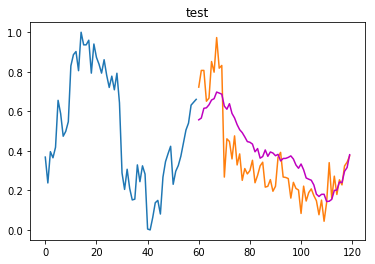

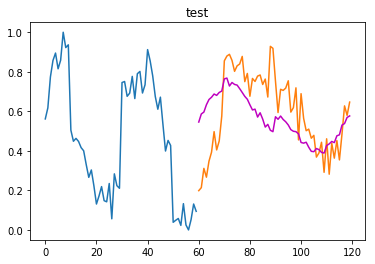

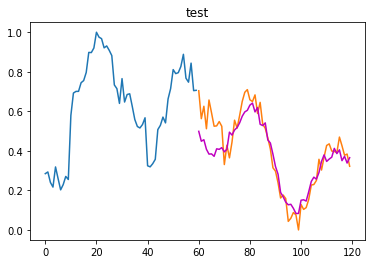

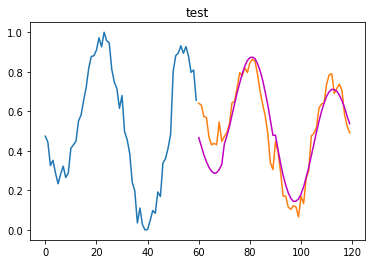

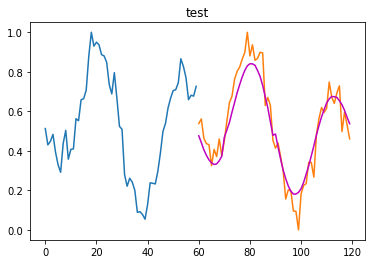

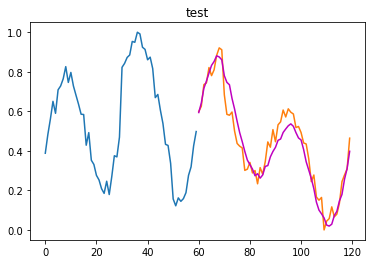

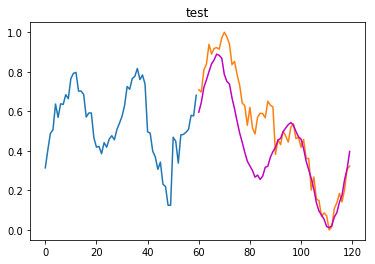

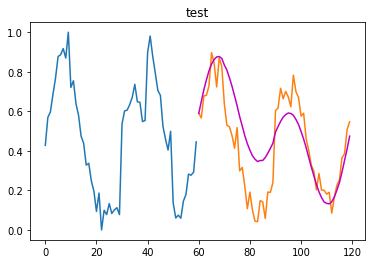

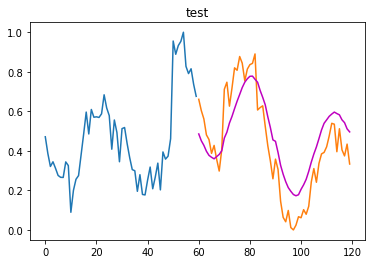

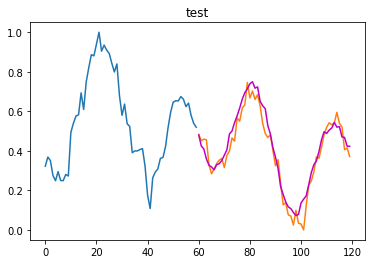

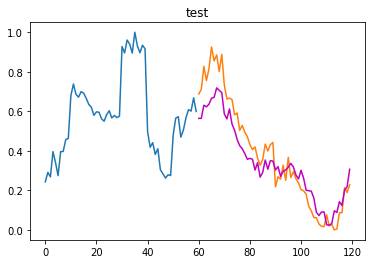

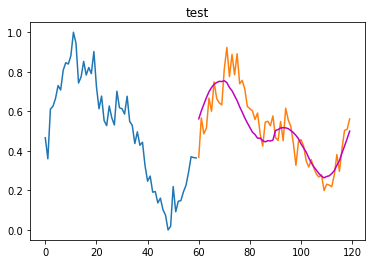

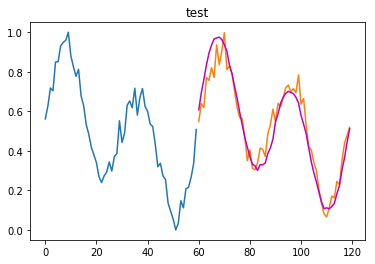

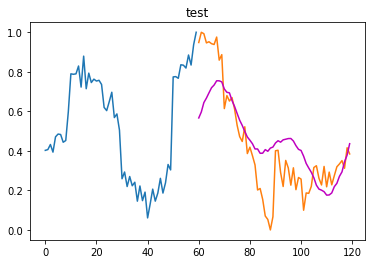

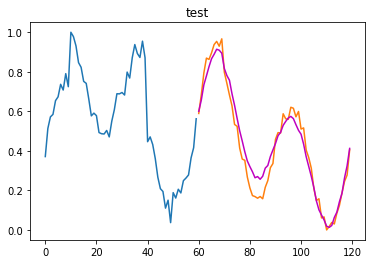

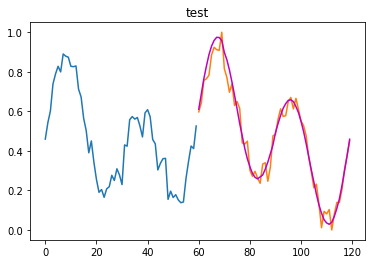

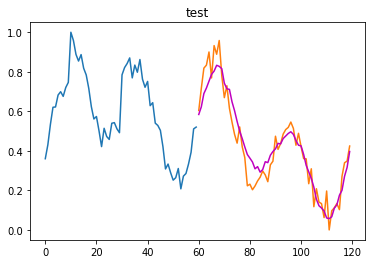

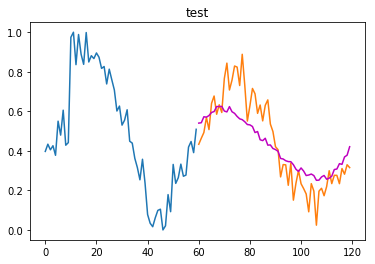

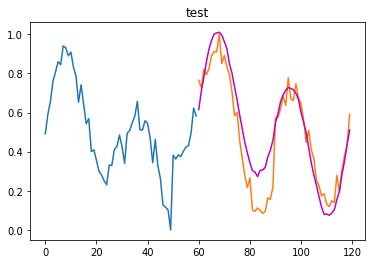

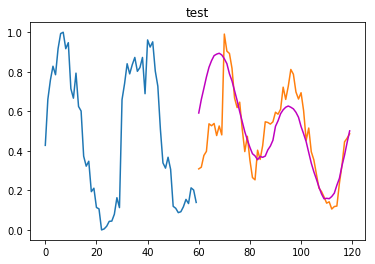

In [20]:
y_pred_test = model.predict(x_test)

random_indexes = range(data.shape[1]/2)
random.shuffle(random_indexes)

for i in random_indexes[:20]:
    plt.figure()
    plt.plot(range(60), x_test[i])
    plt.plot(range(60, 120), y_test[i])
    plt.plot(range(60, 120), y_pred_test[i], c='m')
    plt.title('test')

In [ ]:
y_train.shape

In [ ]:
%time
x, y = [], []
for _ in range(10000):
    
    single_x = np.linspace(0, 1, 60) + 0.1 * np.random.randn(60)
    x.append(single_x)
    y.append(3./4 * single_x + 0.01 * np.random.randn(60))

In [ ]:
for i in range(5):
    plt.plot(x[i], y[i], '.')


In [ ]:
input_dim = 30
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=input_dim))
# model.add(Dense(units=128, activation='relu'))
# model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=input_dim, activation='linear'))


sgd = optimizers.SGD(lr=.5)
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['mae'])

model.fit(np.array(x)[:5000, :30], np.array(y)[:5000, :30], epochs=10, batch_size=16)

In [ ]:
y_pred = model.predict(np.array(x)[:, 30:], batch_size=128)


In [ ]:
for i in range(5):
    plt.figure()
    plt.plot(x[i][30:], y_pred[i], '.')
    plt.plot(x[i][30:], y[i][30:], '.', c='r')
    plt.title('train')


In [ ]:
for i in range(5):
    plt.figure()
    plt.plot(x[5000 + i][:30], y_pred[5000 + i], '.')
    plt.plot(x[5000 + i], y[5000 + i], '.', c='r')
    plt.title('test')


In [ ]:
(0.1 * np.random.randn(1,60)).shape

### Let's calculate the Upper Bound of the revenue

First - Naive calculation

In [ ]:
naive_upper_bound = np.sum(np.max(data.values[60:, :], axis=0) - np.min(data.values[60:, :], axis=0))
print 'naive upper bound = {:.2f}'.format(naive_upper_bound)

The more realistic calculation:

(Considering, that minimum should appear before maximum)

In [ ]:
real_upper_bound = np.sum(max_diff(data.values[60:, col]) for col in range(data.values.shape[1]))
print 'real upper bound = {:.2f}'.format(real_upper_bound)

In [ ]:
np.sum(trade[:, 1] - trade[:, 0])

In [ ]:
plt.hist(trade[:, 1] - trade[:, 0], bins=30);

In [ ]:
!mv max_diff.png img/


<img src="img/max_diff.png",width=400,height=400>

In [ ]:
def max_diff(arr):
    
    """returns max difference in list, such that
    mininmum appears before maximum"""
    
    max_diff = arr[1] - arr[0]
    min_element = arr[0]
    for val in arr:
        if val - min_element > max_diff:
            max_diff = val - min_element
        if val < min_element:
            min_element = val
    return max_diff

In [ ]:
max_diff([9, 1, 2, 4, 10, -10, 2])